# Lab 10
* **Name**: Utkarsh Prakash

## Title
Demostrate different kinds of regularization in autoencoders.

## Objective
* To understand the need of regularization in training an autoencoder.
* To understand the working principle of weight-decay, sparse and contractive autoencoder.

## Experimental Description:
1. **Data Generation:**
We use Fashion MNIST dataset for training and testing.

2. **Neural Network Architecture:**

![Autoencoder Architecture](https://drive.google.com/uc?id=1Yk2nBfDRVjmfuJzUNHUxMAo9We0_BIXa)

The loss function for a normal autoencoder without any regularization is given by:
$$ L(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}})$$ 

where $n$ is the total dimension of the input vector.

**Weight-Decay (l2) Autoencoder**

The loss function for a weight-decay (i.e. l2) regularization is given by:
$$ L(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}}) + \lambda||\theta||_{2}^{2}$$

where $\theta$ is the vector of parameters of the network.

**Sparse Autoencoder**

The loss function for a sparse autoencoder is given by:
$$ L^{\prime}(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}})$$

$$ \Omega(\theta) = \sum_{l=1}^{k} \rho log(\frac{\rho}{\hat\rho_{l}}) + (1-\rho) log(\frac{1-\rho}{1-\hat\rho_{l}}) = D_{KL}(\rho || \rho_{l})$$

$$ L(\theta) = L^{\prime}(\theta) + \Omega(\theta) $$

where $\rho$ is the desired sparsity coefficient and $rho_{l}$ is the average value of the activation of a neuron $l$ given by:
$$ \hat{\rho_{l}} = \frac{1}{m}\sum_{i=1}^{m} h(x_{i})_{l} $$

**Contractive Autoencoder**

The loss function for a contractive autoencoder is given by:

$$ L^{\prime}(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}})$$

$$ \Omega(\theta) = ||J_{x}(h)||_{F}^{2}$$

$$ L(\theta) = L^{\prime}(\theta) + \Omega(\theta) $$

where $ J_{x}(h) $ is the Jacobian matrix of the hidden representation wrt x and $ ||J_{x}(h)||_{F}^{2} $ represents the Frobenious norm of the Jacobian matrix.

3. **Training and Cross Validation:**
    
    For training we use 55,000 images and for cross-validation we use 5,000 images. We use Keras Early Stopping Callback to stop the training if there is no improvement over validation loss for 10 consecutive epochs.
    

4. **Testing:**
    For testing we use 5,000 images.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
# Loading Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = np.expand_dims(X_train_full, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Normalizing the images
X_train_full, X_test = X_train_full/255.0, X_test/255.0

# Creating Cross-validation data
X_val, X_train = X_train_full[:5000], X_train_full[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((55000, 28, 28, 1),
 (55000,),
 (5000, 28, 28, 1),
 (5000,),
 (10000, 28, 28, 1),
 (10000,))

# Normal Autoencoder

$$ L(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}})$$ 

In [ ]:
# Encoder
encoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                tf.keras.layers.MaxPooling2D(2, 2),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')
])
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Shape of the output from the encoder
encoder_output_shape = tuple(encoder.layers[-1].output.shape)[1:]

In [ ]:
# Decoder
decoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=encoder_output_shape),
                tf.keras.layers.UpSampling2D(size=(2, 2)),
                tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])
decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Autoencoder
auto_encoder = tf.keras.models.Sequential([encoder, decoder])
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Training the autoencoder
history = auto_encoder.fit(X_train, X_train, epochs=40,
                           validation_data=(X_val, X_val))

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2942 - val_loss: 0.2478
Epoch 2/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2493 - val_loss: 0.2457
Epoch 3/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2478 - val_loss: 0.2450
Epoch 4/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2476 - val_loss: 0.2441
Epoch 5/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2469 - val_loss: 0.2432
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2461 - val_loss: 0.2428
Epoch 7/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2454 - val_loss: 0.2426
Epoch 8/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2449 - val_loss: 0.2424
Epoch 9/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2446 - val_loss: 0.2422
Epoch 10/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.244

# Weight Decay Autoencoder

$$ L(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}}) + \lambda||\theta||_{2}^{2}$$ 

In [ ]:
# l2 regularizer
kernel_regularizer = tf.keras.regularizers.l2(l2=0.5e-3)

In [ ]:
weight_decay_encoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1), kernel_regularizer=kernel_regularizer),
                tf.keras.layers.MaxPooling2D(2, 2),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=kernel_regularizer),
])
weight_decay_encoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Shape of the output from the encoder
weight_encoder_output_shape = tuple(weight_decay_encoder.layers[-1].output.shape)[1:]

In [ ]:
weight_decay_decoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=weight_encoder_output_shape, kernel_regularizer=kernel_regularizer),
                tf.keras.layers.UpSampling2D(size=(2, 2)),
                tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same', kernel_regularizer=kernel_regularizer)
])
weight_decay_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Autoencoder
weight_decay_auto_encoder = tf.keras.models.Sequential([weight_decay_encoder, weight_decay_decoder])
weight_decay_auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Training the autoencoder
history = weight_decay_auto_encoder.fit(X_train, X_train, epochs=30,
                           validation_data=(X_val, X_val))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3141 - val_loss: 0.2654
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2666 - val_loss: 0.2630
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2641 - val_loss: 0.2613
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2646 - val_loss: 0.2610
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2639 - val_loss: 0.2606
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2638 - val_loss: 0.2608
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2630 - val_loss: 0.2611
Epoch 8/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2632 - val_loss: 0.2605
Epoch 9/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2630 - val_loss: 0.2602
Epoch 10/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.262

# Sparse Autoencoder

$$ L^{\prime}(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}})$$

$$ \Omega(\theta) = \sum_{l=1}^{k} \rho log(\frac{\rho}{\hat\rho_{l}}) + (1-\rho) log(\frac{1-\rho}{1-\hat\rho_{l}}) = D_{KL}(\rho || \rho_{l})$$

$$ L(\theta) = L^{\prime}(\theta) + \Omega(\theta) $$

In [ ]:
K = keras.backend
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return K.sum(self.weight*(
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1- self.target, 1-mean_activities)
        ))

In [ ]:
kld_reg = KLDivergenceRegularizer(weight=1, target=0.1)
sparse_kl_encoder = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', activity_regularizer=kld_reg)
])
sparse_kl_encoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Shape of the output from the encoder
sparse_encoder_output_shape = tuple(sparse_kl_encoder.layers[-1].output.shape)[1:]

In [ ]:
sparse_kl_decoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=sparse_encoder_output_shape),
                tf.keras.layers.UpSampling2D(size=(2, 2)),
                tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])
sparse_kl_decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Autoencoder
sparse_kl_auto_encoder = tf.keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = sparse_kl_auto_encoder.fit(X_train, X_train, epochs=30,
                           validation_data=(X_val, X_val))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 2.0383 - val_loss: 0.2917
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2897 - val_loss: 0.2758
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2757 - val_loss: 0.2634
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2673 - val_loss: 0.2590
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2625 - val_loss: 0.2560
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2596 - val_loss: 0.2562
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2580 - val_loss: 0.2541
Epoch 8/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2577 - val_loss: 0.2525
Epoch 9/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2559 - val_loss: 0.2521
Epoch 10/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.255

# Contractive Autoencoder

$$ L^{\prime}(\theta) = \sum_{j=1}^{n} x_{j}log(\hat{x_{j}}) + (1-x_{j})log(1-\hat{x_{j}})$$

$$ \Omega(\theta) = ||J_{x}(h)||_{F}^{2}$$

$$ L(\theta) = L^{\prime}(\theta) + \Omega(\theta) $$

where $ J_{x}(h) $ is the Jacobian matrix of the hidden representation wrt x and $ ||J_{x}(h)||_{F}^{2} $ represents the Frobenious norm of the Jacobian matrix.

In [ ]:
contractive_encoder = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')
])
contractive_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Shape of the output from the encoder
contractive_encoder_output_shape = tuple(contractive_encoder.layers[-1].output.shape)[1:]

In [ ]:
contractive_decoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=contractive_encoder_output_shape),
                tf.keras.layers.UpSampling2D(size=(2, 2)),
                tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])
contractive_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Autoencoder
contractive_auto_encoder = tf.keras.models.Sequential([contractive_encoder, contractive_decoder])

In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
batch_size = 256

# Prepare a dataset.
dataset = tf.data.Dataset.from_tensor_slices(
              (X_train.astype("float32"), X_train.astype("float32"))
)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

# Instantiate a logistic loss function that expects integer targets.
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for epoch in range(30):
    for step, (x, y) in enumerate(dataset):

        # Open a GradientTape.
        with tf.GradientTape(persistent=True) as tape:
            with tf.GradientTape(persistent=True) as tape1:
                # Forward pass.
                logits = contractive_auto_encoder(x)
                hidden_representation = contractive_encoder(x)
                
            jacobian = tape1.batch_jacobian(hidden_representation, x)
            jacobian = tf.reshape(jacobian, (batch_size, -1))
            norm = tf.norm(jacobian, ord='euclidean', axis=-1)
            regularization_term = tf.reduce_mean(norm)

            # Loss value for this batch.
            loss = loss_fn(y, logits)

            loss = loss + regularization_term

        # Get gradients of weights wrt the loss.
        gradients = tape.gradient(loss, contractive_auto_encoder.trainable_weights)

        # Update the weights of our linear layer.
        optimizer.apply_gradients(zip(gradients, contractive_auto_encoder.trainable_weights))

    # Logging.
    print("Epoch:", epoch+1, "Loss:", float(loss))

Epoch: 1 Loss: 0.6774672865867615
Epoch: 2 Loss: 0.654946506023407
Epoch: 3 Loss: 0.6310061812400818
Epoch: 4 Loss: 0.6090640425682068
Epoch: 5 Loss: 0.5820067524909973
Epoch: 6 Loss: 0.5536983013153076
Epoch: 7 Loss: 0.5182216763496399
Epoch: 8 Loss: 0.4776184558868408
Epoch: 9 Loss: 0.449087530374527
Epoch: 10 Loss: 0.4176420271396637
Epoch: 11 Loss: 0.4030126929283142
Epoch: 12 Loss: 0.3874794542789459
Epoch: 13 Loss: 0.36368241906166077
Epoch: 14 Loss: 0.34846755862236023
Epoch: 15 Loss: 0.35914215445518494
Epoch: 16 Loss: 0.3383650779724121
Epoch: 17 Loss: 0.3484106957912445
Epoch: 18 Loss: 0.33999475836753845
Epoch: 19 Loss: 0.334501177072525
Epoch: 20 Loss: 0.34059348702430725
Epoch: 21 Loss: 0.330043762922287
Epoch: 22 Loss: 0.3309202194213867
Epoch: 23 Loss: 0.3194076418876648
Epoch: 24 Loss: 0.3230486214160919
Epoch: 25 Loss: 0.3266180753707886
Epoch: 26 Loss: 0.3258221447467804
Epoch: 27 Loss: 0.3219432532787323
Epoch: 28 Loss: 0.3238377869129181
Epoch: 29 Loss: 0.3139551877

## Results and Comparison

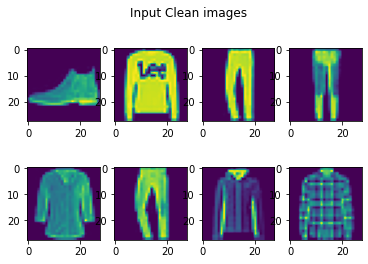

In [ ]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Clean images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

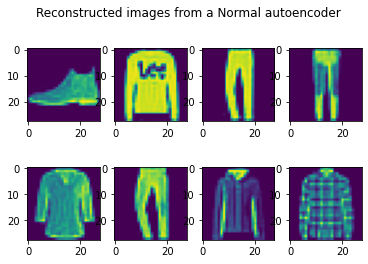

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a Normal autoencoder")

for i in range(8):
    auto_encoder_output = auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

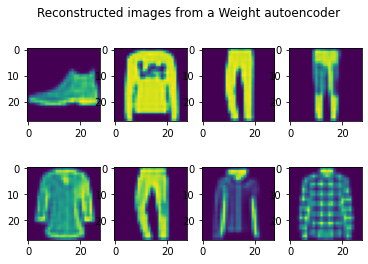

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a Weight autoencoder")

for i in range(8):
    auto_encoder_output = weight_decay_auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

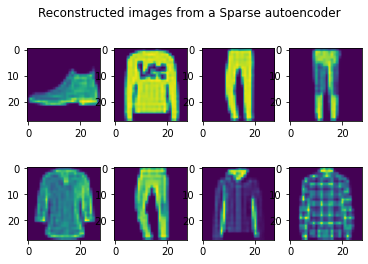

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a Sparse autoencoder")

for i in range(8):
    auto_encoder_output = sparse_kl_auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

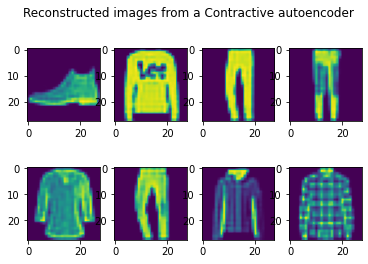

In [ ]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from a Contractive autoencoder")

for i in range(8):
    auto_encoder_output = contractive_auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

## Observations and Conclusions
* The normal autoencoder without any regularization is vulnerable of overfitting and hence, does not generalizes well.
* The weight-decay, sparse and contractive autoencoder regularize the autoencoder and prevent it from overfitting.
* The performance of sparse and contractive autoencoder is better than that of weight-decay autoencoder.

## References
1. Deep Learning by Ian Goodfellow, Yoshua Bengio and Aaron Courville, 2016
2. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurelien Geron, 2019
3. http://alexlenail.me/NN-SVG/LeNet.html for plotting the CNN architecture.